<a href="https://colab.research.google.com/github/Valerie-Osawe/prime_videos_exploration/blob/main/prime_video_Data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

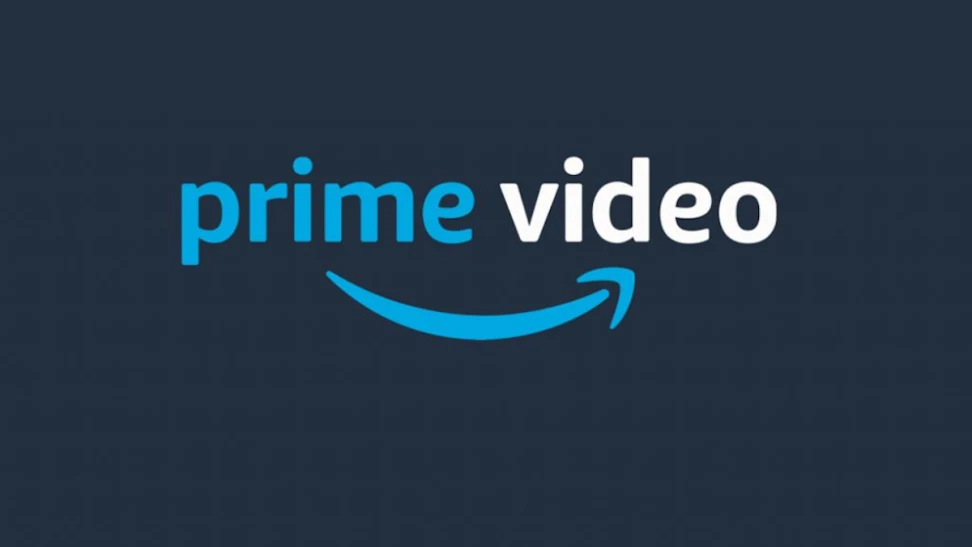

### Data Cleaning

<a id='intro'></a>
#### Introduction

#### Amazon Prime Video - TV Shows and Movies
This dataset was created to list all shows and movies available on Amazon Prime. It was collected from JustWatch in March 2023, containing data available in the United States.

Content
This dataset contains two files, one for the titles (titles.csv) and the other for the cast (credits.csv) of each movie and show on the platform.

The titles.csv contains more than 10k titles, witch 15 columns containing:

- id: The title ID on JustWatch.
- title: The name of the title.
- show_type: TV show or movie.
- description: A brief description.
- release_year: The release year.
- age_certification: The age certification.
- runtime: The length of the episode (SHOW) or movie.
- genres: A list of genres.
- production_countries: A list of countries that - produced the title.
- seasons: Number of seasons if it's a SHOW.
- imdb_id: The title ID on IMDB.
- imdb_score: Score on IMDB.
- imdb_votes: Votes on IMDB.
- tmdb_popularity: Popularity on TMDB.
- tmdb_score: Score on TMDB.

The credits.csv contains over 140k credits of actors and directors, with 5 columns containing:

- person_ID: The person ID on JustWatch.
- id: The title ID on JustWatch.
- name: The actor or director's name.
- character: The character name.
- role: ACTOR or DIRECTOR.

  ##### Objective
  
  Clean the datasets for exploratory data analysis

#### Imports

In [ ]:
# Built-in library
import itertools

# Standard imports
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import missingno as msno

%matplotlib inline

# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 1_000


# Black code formatter
%load_ext lab_black

In [ ]:
# load data
credit = pd.read_csv("credits.csv")
title = pd.read_csv("titles.csv")

##### Clean the credit csv

In [ ]:
credit.head()

,person_id,id,name,character,role
0,25020,tm87233,James Stewart,George Bailey,ACTOR
1,26190,tm87233,Donna Reed,Mary Hatch,ACTOR
2,25653,tm87233,Lionel Barrymore,Mr. Potter,ACTOR
3,13301,tm87233,Thomas Mitchell,Uncle Billy,ACTOR
4,34171,tm87233,Henry Travers,Clarence,ACTOR


Rename the person id and id to id and title id respectively for uniformity with the title csv

In [ ]:
# rename person id to id and id to title id
credit = credit.rename(columns={"person_id": "id", "id": "title_id"})
credit.columns

Index(['id', 'title_id', 'name', 'character', 'role'], dtype='object')

In [ ]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140553 entries, 0 to 140552
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         140553 non-null  int64 
 1   title_id   140553 non-null  object
 2   name       140553 non-null  object
 3   character  122705 non-null  object
 4   role       140553 non-null  object
dtypes: int64(1), object(4)
memory usage: 5.4+ MB


In [ ]:
# check for duplicates
duplicate = credit.duplicated().any().sum()
print(duplicate)

0


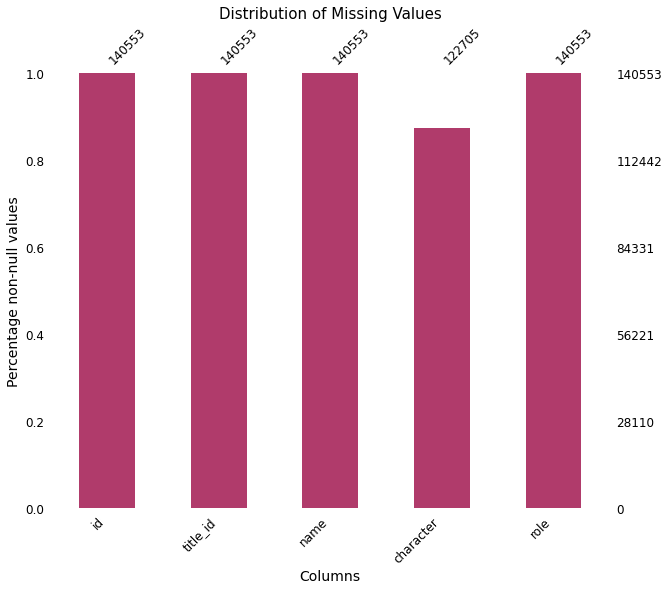

In [ ]:
# plot the missing values in credit dataset with bar chart
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_title("Distribution of Missing Values", fontsize=15)
ax.set_xlabel("Columns", fontsize=14)
ax.set_ylabel("Percentage non-null values", fontsize=14)
msno.bar(credit, ax=ax, color=(0.69, 0.23, 0.42), fontsize=12)
plt.show()

From the plot above it can be seen about 0.1 of the characters rows are missing.

In [ ]:
credit.role.value_counts()

ACTOR       131164
DIRECTOR      9389
Name: role, dtype: int64

It can be seen that most of the role in the movies/shows are actors. More investigation needs to be carried out to find out if the missing values in the character column are from the directors as they usually do not play any character in movies or shows 

In [ ]:
# check if the missing values in character are from director
credit.query("character != character & role != 'DIRECTOR'").shape[
    0
] == credit.character.isna().sum()

False

After checking to know if the if the missing values in the character column are from the directors, it can be seen that the missing values are not only from the directors. Therefore the missing values not from directors will be dropped, while the missing values from directors will be replaced with 'NOT A CHARACTER'.

In [ ]:
drop_na = credit.query("character != character & role != 'DIRECTOR'")
credit = credit.drop(drop_na.index)
credit.head()

,id,title_id,name,character,role
0,25020,tm87233,James Stewart,George Bailey,ACTOR
1,26190,tm87233,Donna Reed,Mary Hatch,ACTOR
2,25653,tm87233,Lionel Barrymore,Mr. Potter,ACTOR
3,13301,tm87233,Thomas Mitchell,Uncle Billy,ACTOR
4,34171,tm87233,Henry Travers,Clarence,ACTOR


In [ ]:
credit.character.fillna("Not A Character", inplace=True)
credit.sample(10)

,id,title_id,name,character,role
114743,228516,tm818538,Johnpaul George,Not A Character,DIRECTOR
44471,38870,tm455118,Anne Francis,Catherine Pritcher,ACTOR
48847,1075336,ts30508,Yael Eitan,Dana,ACTOR
138293,291002,tm936394,Ayris Alptekin,Zehra,ACTOR
68692,36324,tm69176,Jonathan Klein,Dave Ross,ACTOR
93072,25322,tm322148,Jonah Russell,Pete,ACTOR
130180,5358,tm458118,Michael B. Jordan,John Kelly,ACTOR
11048,27335,tm95443,Carl Stockdale,Charles Brandon,ACTOR
129847,33814,tm817412,Thierry Lhermitte,Yves Lamarque,ACTOR
84619,99165,tm147658,Frédéric Tcheng,Not A Character,DIRECTOR


In [ ]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132094 entries, 0 to 140552
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         132094 non-null  int64 
 1   title_id   132094 non-null  object
 2   name       132094 non-null  object
 3   character  132094 non-null  object
 4   role       132094 non-null  object
dtypes: int64(1), object(4)
memory usage: 6.0+ MB


Further investigaion shows the that the character column has voice in it. It will be better to remove that from the character column and add it to the role column to indicate that the actor was a voice actor.

In [ ]:
# Append voice to the 'role' column if the 'character' column contains voice
credit.loc[
    credit["character"].str.contains("(voice)", regex=False), "role"
] += "(voice)"
# remove the voice from the charcter column
credit["character"] = credit["character"].str.replace("(voice)", "", regex=False)
# check the first 10 rows of the 'voice_rows' DataFrame to verify that  voice has been removed and appended to the character column
voice_rows = credit.loc[credit["role"].str.contains("(voice)", regex=False)]
print(voice_rows.head(10))

          id  title_id                      name                   character  \
70     63894   tm87233             Joseph Granby   Elderly Man  (uncredited)   
98      6144   tm87233              Moroni Olsen  Senior Angel  (uncredited)   
501   571172   tm83723             Kenny Gardner                       Dick    
502   571171   tm83723             Gwen Williams                       Mary    
503   104794   tm83723               Jack Mercer                 Mr. Bumble    
504   132987   tm83723               Tedd Pierce           C. Bagley Beetle    
505   571169   tm83723                Stan Freed                    Hoppity    
506   569092   tm83723                Carl Meyer                      Smack    
509    62979   tm83723  Guinn "Big Boy" Williams      Narrator  (uncredited)   
1344   14704  tm165135              Claude Rains  Jacob Marley  (uncredited)   

              role  
70    ACTOR(voice)  
98    ACTOR(voice)  
501   ACTOR(voice)  
502   ACTOR(voice)  
503   ACTOR(vo

In [ ]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132094 entries, 0 to 140552
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         132094 non-null  int64 
 1   title_id   132094 non-null  object
 2   name       132094 non-null  object
 3   character  132094 non-null  object
 4   role       132094 non-null  object
dtypes: int64(1), object(4)
memory usage: 6.0+ MB


#### Clean the title csv

In [ ]:
title.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm87233,It's a Wonderful Life,MOVIE,"A holiday favourite for generations... George Bailey has spent his entire life giving to the people of Bedford Falls. All that prevents rich skinflint Mr. Potter from taking over the entire town is George's modest building and loan company. But on Christmas Eve the business's $8,000 is lost and George's troubles begin.",1946,PG,130,"['drama', 'family', 'fantasy', 'romance', 'comedy']",['US'],NaN,tt0038650,8.6,467766.0,27.611,8.261
1,tm143047,Duck Soup,MOVIE,Rufus T. Firefly is named president/dictator of bankrupt Freedonia and declares war on neighboring Sylvania over the love of wealthy Mrs. Teasdale.,1933,NaN,69,"['comedy', 'war']",['US'],NaN,tt0023969,7.8,60933.0,9.013,7.357
2,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper editor Walter Burns, visits his office to inform him that she's engaged and will be getting remarried the next day. Walter can't let that happen and frames the fiancé, Bruce Baldwin, for one thing after another, to keep him temporarily held in prison, while trying to steer Hildy into returning to her old job as his employee.",1940,NaN,92,"['drama', 'romance', 'comedy']",['US'],NaN,tt0032599,7.8,60244.0,14.759,7.433
3,ts20945,The Three Stooges,SHOW,"The Three Stooges were an American vaudeville and comedy team active from 1922 until 1970, best known for their 190 short subject films by Columbia Pictures that have been regularly airing on television since 1958. Their hallmark was physical farce and slapstick. In films, the stooges were commonly known by their actual first names. There were a total of six stooges over the act's run (with only three active at any given time), but Moe Howard and Larry Fine were the mainstays throughout the ensemble's nearly fifty-year run.",1934,TV-PG,19,"['comedy', 'family']",['US'],26.0,tt0850645,8.5,1149.0,15.424,7.600
4,tm5012,Red River,MOVIE,"Headstrong Thomas Dunson starts a thriving Texas cattle ranch with the help of his faithful trail hand, Groot, and his protégé, Matthew Garth, an orphan Dunson took under his wing when Matt was a boy. In need of money following the Civil War, Dunson and Matt lead a cattle drive to Missouri, where they will get a better price than locally, but the crotchety older man and his willful young partner begin to butt heads on the exhausting journey.",1948,NaN,133,"['western', 'drama', 'romance', 'action']",['US'],NaN,tt0040724,7.8,32210.0,12.400,7.400


In [ ]:
title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10873 entries, 0 to 10872
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10873 non-null  object 
 1   title                 10873 non-null  object 
 2   type                  10873 non-null  object 
 3   description           10729 non-null  object 
 4   release_year          10873 non-null  int64  
 5   age_certification     3688 non-null   object 
 6   runtime               10873 non-null  int64  
 7   genres                10873 non-null  object 
 8   production_countries  10873 non-null  object 
 9   seasons               1551 non-null   float64
 10  imdb_id               10172 non-null  object 
 11  imdb_score            9765 non-null   float64
 12  imdb_votes            9753 non-null   float64
 13  tmdb_popularity       10302 non-null  float64
 14  tmdb_score            8747 non-null   float64
dtypes: float64(5), int6

In [ ]:
title.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,10873.000000,10873.000000,1551.000000,9765.000000,9.753000e+03,10302.000000,8747.000000
mean,2004.077807,85.869033,2.661509,5.970558,8.973232e+03,7.614083,5.977729
std,24.883711,34.156332,3.719633,1.362815,4.897767e+04,45.845289,1.512941
min,1912.000000,0.000000,1.000000,1.100000,5.000000e+00,0.000153,0.500000
25%,2002.000000,65.000000,1.000000,5.100000,1.190000e+02,1.327250,5.066500
50%,2015.000000,89.000000,1.000000,6.100000,4.880000e+02,2.658500,6.000000
75%,2019.000000,102.000000,3.000000,7.000000,2.493000e+03,6.185000,6.983000
max,2023.000000,940.000000,53.000000,9.900000,2.081757e+06,3187.531000,10.000000


In [ ]:
# checking for we have duplicates
duplicate = title.duplicated().any().sum()
print(duplicate)

0


To easily perform exploratory data analysis the genres and production countries need to splitted into more rows. Therefore the quotes and brackets needs to be removed from them first before splitting into multiple rows

In [ ]:
# define the translation table to remove quotes and brackets
translation_table = str.maketrans("", "", "[]'")

# remove quotes and brackets from Column1 using the translation table
title[["genres", "production_countries"]] = title[
    ["genres", "production_countries"]
].apply(lambda x: x.str.translate(translation_table))

# view the modified columns
title[["genres", "production_countries"]].sample(5)

,genres,production_countries
10718,comedy,US
6552,"action, comedy, crime",IN
1860,drama,AU
171,"drama, romance",US
10586,drama,GB


In [ ]:
# Split the values in the genres and production_countries columns
title["genres"] = title["genres"].str.split(", ")
title["production_countries"] = title["production_countries"].str.split(", ")

# Explode the columns
title = title.explode("genres")
title = title.explode("production_countries")

#  Reset the index
title = title.reset_index(drop=True)

In [ ]:
title.genres.unique()

array(['drama', 'family', 'fantasy', 'romance', 'comedy', 'war',
       'western', 'action', 'european', 'animation', 'scifi', 'horror',
       'thriller', 'crime', 'sport', 'history', 'music', 'documentation',
       '', 'reality'], dtype=object)

In [ ]:
title.production_countries.unique()

array(['US', 'GB', 'SU', 'DE', 'MX', 'CA', 'IN', '', 'SE', 'IT', 'PA',
       'ES', 'MA', 'FR', 'HK', 'JP', 'NL', 'PR', 'IE', 'PH', 'CH', 'RO',
       'YU', 'XC', 'LI', 'KR', 'CI', 'CO', 'TW', 'MC', 'IL', 'EG', 'RU',
       'ZA', 'AU', 'NZ', 'AT', 'HU', 'CN', 'TR', 'PT', 'BR', 'GR', 'CL',
       'AN', 'DK', 'CZ', 'IR', 'BE', 'FI', 'LU', 'AR', 'ID', 'VE', 'NO',
       'BG', 'TH', 'PL', 'DO', 'AE', 'RW', 'SK', 'SZ', 'AF', 'JM', 'SG',
       'IS', 'RS', 'BO', 'LT', 'UA', 'UY', 'QA', 'TN', 'SA', 'EC', 'KZ',
       'NG', 'VN', 'MT', 'CF', 'GD', 'KE', 'SO', 'BD', 'CU', 'GE', 'ET',
       'TT', 'BY', 'MY', 'PK', 'PE', 'XK', 'CR', 'PS', 'LV', 'SV', 'TC',
       'LB', 'NP', 'MN', 'NI', 'SB', 'VU', 'AQ', 'FM', 'UZ', 'NA', 'AZ',
       'KH', 'CM', 'EE', 'AL', 'SY', 'IQ', 'BM', 'IO', 'JO', 'SI', 'BA',
       'HR', 'CY', 'PF', 'FJ', 'HN', 'NC', 'OM', 'MK'], dtype=object)

In [ ]:
# checking for we have missing values
missing_values = title.isna().sum()
print(missing_values)

id                          0
title                       0
type                        0
description               173
release_year                0
age_certification       16785
runtime                     0
genres                      0
production_countries        0
seasons                 25247
imdb_id                   969
imdb_score               1539
imdb_votes               1553
tmdb_popularity           826
tmdb_score               3684
dtype: int64


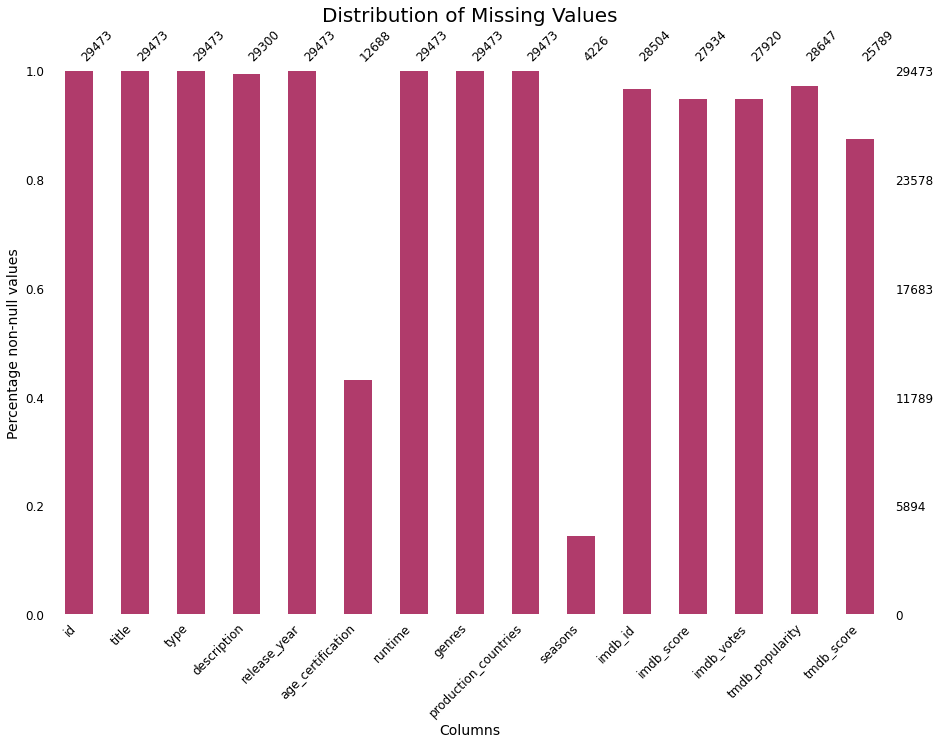

In [ ]:
# plot the missing values in title dataset with bar chart
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title("Distribution of Missing Values", fontsize=20)
ax.set_xlabel("Columns", fontsize=14)
ax.set_ylabel("Percentage non-null values", fontsize=14)
msno.bar(title, ax=ax, color=(0.69, 0.23, 0.42), fontsize=12)
plt.show()

From the plot above it can be seen that about 0.9 of the seasons values are missing. it can also be seen that age certification has lots of missing values. imdb id, imdb score, imdb votes, tmdb popularity and tmdb score also has missing values 

In [ ]:
title.type.value_counts()

MOVIE    25247
SHOW      4226
Name: type, dtype: int64

It can be seen that most of the type are  movies. More investigation needs to be carried out to find out if the missing values in the seasons column are from the movie rows as movies usually are not in seasons.

In [ ]:
# Check to find out if movies are the missing values in seasons
title.query("seasons != seasons & type == 'MOVIE'").shape[
    0
] == title.seasons.isna().sum()

True

After checking to know if the if the missing values in the seasons column are from the movie row, it can be seen that the missing values are from the movie rows. Therefore the missing values from the movie rows will be replaced with 0.

In [ ]:
# replace the missing values in seasons with 0
title.seasons.fillna(0, inplace=True)

In [ ]:
# drop description, age_certification columns
title.drop(["description", "age_certification"], axis=1, inplace=True)

In [ ]:
title.dropna(inplace=True)

In [ ]:
title.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24984 entries, 0 to 29469
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    24984 non-null  object 
 1   title                 24984 non-null  object 
 2   type                  24984 non-null  object 
 3   release_year          24984 non-null  int64  
 4   runtime               24984 non-null  int64  
 5   genres                24984 non-null  object 
 6   production_countries  24984 non-null  object 
 7   seasons               24984 non-null  float64
 8   imdb_id               24984 non-null  object 
 9   imdb_score            24984 non-null  float64
 10  imdb_votes            24984 non-null  float64
 11  tmdb_popularity       24984 non-null  float64
 12  tmdb_score            24984 non-null  float64
dtypes: float64(5), int64(2), object(6)
memory usage: 2.7+ MB


Save the cleaned dataset into a new csv

In [ ]:
credit.to_csv("credit.csv", index=False)
title.to_csv("title.csv", index=False)